In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [5]:
#show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [7]:
#calculate percentage of ontime value =1 div by all rows

wego['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [8]:
#77 percent of the buses arrived on time
270048/(270048+80281)

0.7708411236295025

In [9]:
wego['PREV_SCHED_STOP_CANCELLED'].value_counts()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [10]:
#Count the values that each row occurs
adjcounts= wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [11]:
#percentage of ontime trips
((adjcounts['count'].loc[0])/(adjcounts['count']
                              .loc[0]+adjcounts['count']
                           .loc[1]+adjcounts['count'].loc[3]))


# ALt# Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

0.7969285341187095

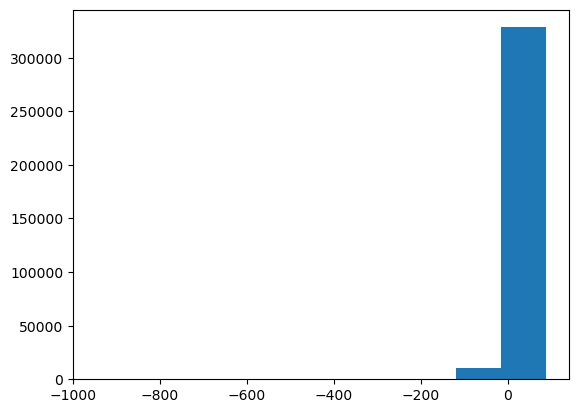

In [29]:
plt.hist(x=wego['ADHERENCE'],bins=10)  #, y= wego['HDWY_DEV'])
plt.show()

<Axes: xlabel='HDWY_DEV'>

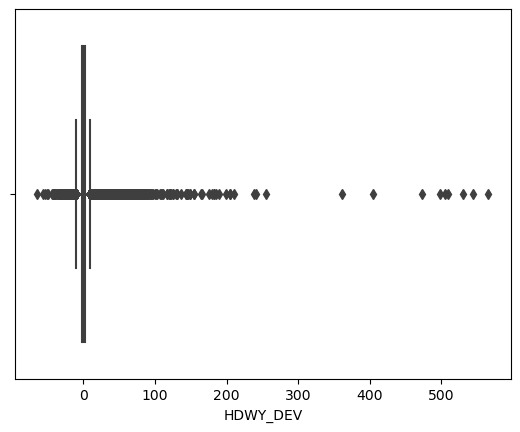

In [30]:
sns.boxplot(x='HDWY_DEV', data=wego)

<Axes: xlabel='ADHERENCE'>

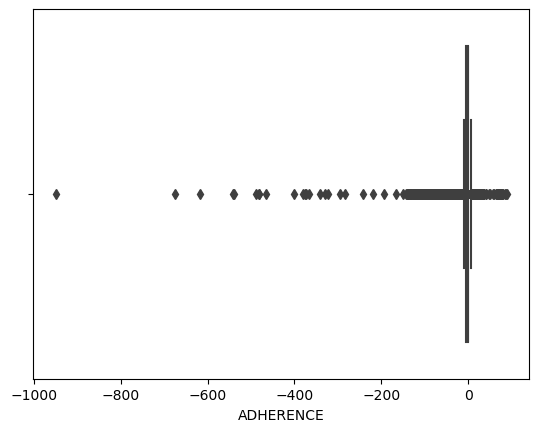

In [31]:
sns.boxplot(x='ADHERENCE', data=wego)

In [32]:
#sns.displot(data=wego["ADHERENCE"], kde=True)
#sns.violinplot(data=wego,x=wego["ADHERENCE"])

In [33]:
wego['IS_RELIEF'].value_counts()

IS_RELIEF
0    346141
1      4188
Name: count, dtype: int64

In [2]:
#add scheduled column value is 1
ontime = wego[wego['ADJUSTED_ONTIME_COUNT']==1]& ontime
head()

NameError: name 'wego' is not defined

In [37]:
#wego['ADHERENCE'].agg(min, max)
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [38]:
wego['ADHERENCE'].max()

88.383333

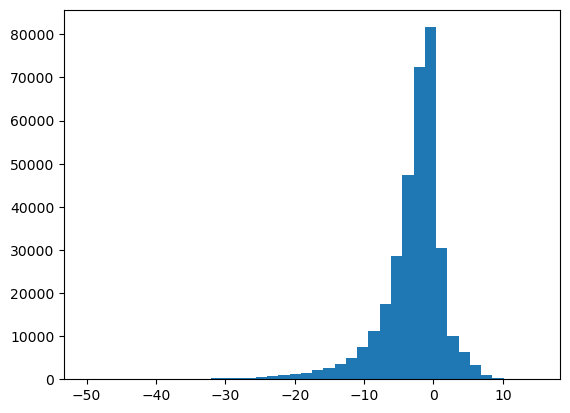

In [39]:
plt.hist(x=wego['ADHERENCE'],bins=40, range=(-50, 15))  #, y= wego['HDWY_DEV'])
plt.show()

In [40]:
#trim cancelled = 1 and headway great
sced = wego[wego['PREV_SCHED_STOP_CANCELLED']==1]
#sced
adsort= sced.sort_values(['ACTUAL_HDWY'])
adsort.shape

(4254, 30)

In [41]:
wego2 = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]
wego2.shape

(346075, 30)

In [42]:
#percentile cleaning
headway =wego2['HDWY_DEV']
headway2 = headway.dropna()
headwaydev_1= np.percentile(headway2,.1)
headwaydev_99=np.percentile(headway2,99.9)

print(headwaydev_1)
print(headwaydev_99)

-21.624767162
56.43715000000084


In [43]:
wego3= wego2[wego2['HDWY_DEV']>=56]

wego3.shape

(269, 30)

In [44]:
#Cleaned wego data removed PREV_SCHED_STOP_CANCELLED = 1 and Where early, late and on-time = 0

In [45]:
#df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)

wego4 = wego2.drop(wego2[(wego2.ADJUSTED_EARLY_COUNT==0)& (wego2.ADJUSTED_LATE_COUNT==0) & 
                        (wego2.ADJUSTED_ONTIME_COUNT==0)].index)

wego4.shape

(335191, 30)

In [46]:
wego4['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    267312
0     67879
Name: count, dtype: int64

In [47]:
adjcounts2= wego4[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts2

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,267312
1,0,1,0,58183
2,1,0,0,9696


In [48]:
# On-time performance

267312/(267312+58183+9696)

0.7974915794278487

In [49]:
#Buses are on-time 80 percent of the time

In [50]:
#percentile cleaning
headwy =wego4['HDWY_DEV']
headwy2 = headwy.dropna()
headwydev_1= np.percentile(headwy2,.1)
headwydev_99=np.percentile(headwy2,99.9)

print(headwydev_1)
print(headwydev_99)

-21.624767162
56.43715000000084


In [51]:
#percentile cleaning
adhe =wego4['ADHERENCE']
adhe_1= np.percentile(adhe,.1)
adhe_99=np.percentile(adhe,99.9)

print(adhe_1)
print(adhe_99)

-57.040499999999994
9.466666


In [52]:
wego5 = wego4.drop(wego4[wego4.ADHERENCE < adhe_1].index)
wego6 = wego5.drop(wego5[wego5.ADHERENCE > adhe_99].index)
wego7 = wego6.drop(wego6[wego6.HDWY_DEV < headwydev_1].index)
wego8 = wego7.drop(wego7[wego7.HDWY_DEV > headwydev_99].index)
wego8.shape

(334031, 30)

In [54]:
# wegos=wego8
# wego

In [55]:
adjusted_counts = wego8[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [56]:
adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266891
1,0,1,0,57690
2,1,0,0,9450


In [57]:
#On-time
266891/(266891+57690+9450)

0.7990006915525805

In [58]:
#Early
9450/(266891+57690+9450)

0.028290787382009453

In [59]:
#Late
57690/(266891+57690+9450)

0.1727085210654101

In [ ]:
headway, bunching,  normal 